In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [24]:
def load_weight_statistics(save_dir=None):
    if save_dir is None:
        save_dir = os.path.join(
            os.environ.get('RESULTS_DIR', 'results'),
            'weight_statistics'
        )
    stats = np.load(save_dir)
    _, _, n_neurons = stats.shape
    return {
        'in_norm': stats[0],
        'in_bias': stats[1],
        'out_norm': stats[2],
        'out_bias': stats[3, :, :n_neurons//4],
        'cos': stats[4]
    }

vanilla_stats = load_weight_statistics(save_dir = '/home/ewolos/sparse-probing-paper/saved_stats/llama2-vanilla-stats.npy')
lora_stats = load_weight_statistics(save_dir = '/home/ewolos/sparse-probing-paper/saved_stats/llama2-lora-stats.npy')

In [1]:
def plot_normalized_median_norm_bias(models, model_stats, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    for model in models[1:]:
        in_norm = model_stats[model]['in_norm']
        in_bias = model_stats[model]['in_bias']
        n_layers, n_neurons = in_norm.shape

        sp_score = np.median((in_norm * in_bias), axis=1) / \
            np.max(np.median(np.abs(in_norm * in_bias), axis=1))
        relative_depth = np.arange(n_layers) / (n_layers - 1)
        ax.plot(relative_depth, sp_score, label=model.split('-')[-1])

    ax.legend(ncol=2, loc='lower right',
              title='pythia model', fontsize='small')
    ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    ax.set_xlabel('relative layer depth')
    ax.set_ylabel('normalized median($||W_{in}||_2 b_{in}$)')
    ax.set_xlim(-0.005, 1.005)
    # turn off top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

/tmp/ipykernel_33729/4004583250.py:9: RuntimeWarning: invalid value encountered in divide
  sp_score = np.median((in_norm * in_bias), axis=1) / np.max(np.median(np.abs(in_norm * in_bias), axis=1))


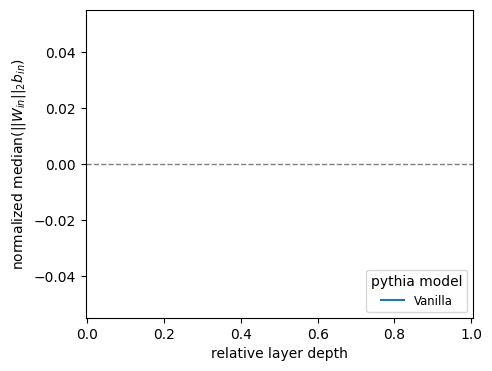

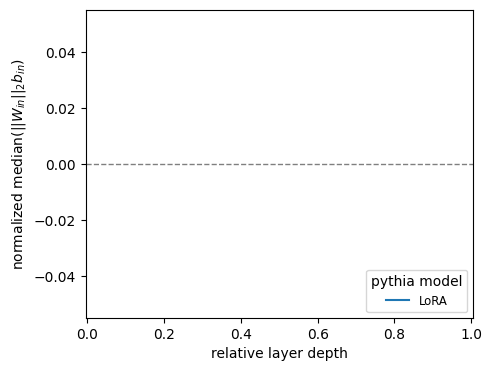

In [25]:
def plot_normalized_median_norm_bias(model_stats, title = 'Title', ax=None):
    
    fig = plt.figure(figsize=(5, 4))
    
    in_norm = model_stats['in_norm']
    in_bias = model_stats['in_bias']
    n_layers, n_neurons = in_norm.shape

    sp_score = np.median((in_norm * in_bias), axis=1) / np.max(np.median(np.abs(in_norm * in_bias), axis=1))
        
    relative_depth = np.arange(n_layers) / (n_layers - 1)
    plt.plot(relative_depth, sp_score, label=title)

    plt.legend(ncol=2, loc='lower right',
              title='pythia model', fontsize='small')
    plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    plt.xlabel('relative layer depth')
    plt.ylabel('normalized median($||W_{in}||_2 b_{in}$)')
    plt.xlim(-0.005, 1.005)
    # turn off top and right spines
    #plt.spines['top'].set_visible(False)
    #plt.spines['right'].set_visible(False)

plot_normalized_median_norm_bias(vanilla_stats, title='Vanilla')
plot_normalized_median_norm_bias(lora_stats, title= 'LoRA')

In [12]:
in_norm = vanilla_stats['in_norm']
in_bias = vanilla_stats['in_bias']
np.median((in_norm * in_bias), axis=1) / np.max(np.median(np.abs(in_norm * in_bias), axis=1))

/tmp/ipykernel_33729/3119785665.py:3: RuntimeWarning: invalid value encountered in divide
  np.median((in_norm * in_bias), axis=1) / np.max(np.median(np.abs(in_norm * in_bias), axis=1))


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])

In [13]:
np.max(np.median(np.abs(in_norm * in_bias), axis=1))

0.0

In [14]:
np.median((in_norm * in_bias), axis=1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
in_bias[in_bias != 0]

array([], dtype=float64)

In [23]:
in_bias.shape

(32, 11008)

In [26]:
lora_stats['in_bias']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])